<a href="https://colab.research.google.com/github/saharkoohfar/EV-charging-load-forecasting/blob/main/CRASH_SEVERTY_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from more_itertools import sliced
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, SpatialDropout1D, RNN, SimpleRNN
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import tensorflow as tf
import math 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import preprocessing
import seaborn as sns


In [ ]:
df = pd.read_csv('Crash_64E.csv')
df=df.sort_values('CRASH_DT')

df.set_index('CRASH_DT', inplace=True)
df.index = pd.to_datetime(df.index)

In [ ]:
df.dropna(axis=1)


,CRASH_SEVE,PEDESTRI_1,VEH_COUNT,WEATHER_CO,LIGHT_COND,RD_TYPE,TRAFFIC_CO,TRFC_CTRL_,FIRST_HA_1,ALCOHOL_NO,BELTED_UNB,DRUG_NODRU,YOUNG_NOTY,NIGHT,AREA_TYPE
CRASH_DT,,,,,,,,,,,,,,,
2015-01-01,O,0,1,1,5,2,6,1,2,1,1,0,0,1,1
2015-01-01,B,0,1,1,5,2,6,1,4,0,0,0,0,1,0
2016-01-01,O,0,3,1,2,0,6,1,1,0,0,0,0,0,1
2016-01-01,B,0,1,1,2,1,6,1,2,0,0,0,0,0,1
2017-01-01,A,0,2,1,4,0,6,1,1,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-09,B,0,1,5,2,2,6,1,8,0,0,0,0,0,1
2021-09-09,O,0,3,1,4,0,6,1,1,0,0,0,1,1,1
2021-09-09,O,0,3,5,2,0,6,1,1,0,0,0,0,0,1


In [ ]:
df.describe()

,PEDESTRI_1,VEH_COUNT,WEATHER_CO,LIGHT_COND,RD_TYPE,TRAFFIC_CO,TRFC_CTRL_,FIRST_HA_1,ALCOHOL_NO,BELTED_UNB,DRUG_NODRU,YOUNG_NOTY,NIGHT,AREA_TYPE
count,15840.000000,15840.000000,15840.000000,15840.000000,15840.000000,15840.000000,15840.000000,15840.000000,15840.000000,15840.000000,15840.000000,15840.000000,15840.000000,15840.000000
mean,0.001578,1.958965,1.879482,2.711364,0.543371,6.288194,1.046654,1.427020,0.036806,0.027146,0.006061,0.188258,0.282765,0.761048
std,0.049596,0.898797,1.702824,1.188321,0.934032,1.734972,0.441725,1.058299,0.188290,0.162515,0.077616,0.390930,0.450357,0.426457
min,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,2.000000,0.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,2.000000,1.000000,2.000000,0.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,2.000000,1.000000,4.000000,1.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,3.000000,9.000000,11.000000,7.000000,3.000000,17.000000,6.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df['CRASH_SEVE'] = df['CRASH_SEVE'].replace(['K', 'A', 'B', 'O','C'], [3,2,1,1,0])
df.describe()

,CRASH_SEVE,PEDESTRI_1,VEH_COUNT,WEATHER_CO,LIGHT_COND,RD_TYPE,TRAFFIC_CO,TRFC_CTRL_,FIRST_HA_1,ALCOHOL_NO,BELTED_UNB,DRUG_NODRU,YOUNG_NOTY,NIGHT,AREA_TYPE
count,15840.000000,15840.000000,15840.000000,15840.000000,15840.000000,15840.000000,15840.000000,15840.000000,15840.000000,15840.000000,15840.000000,15840.000000,15840.000000,15840.000000,15840.000000
mean,1.032134,0.001578,1.958965,1.879482,2.711364,0.543371,6.288194,1.046654,1.427020,0.036806,0.027146,0.006061,0.188258,0.282765,0.761048
std,0.304712,0.049596,0.898797,1.702824,1.188321,0.934032,1.734972,0.441725,1.058299,0.188290,0.162515,0.077616,0.390930,0.450357,0.426457
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,0.000000,2.000000,1.000000,2.000000,0.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,3.000000,3.000000,9.000000,11.000000,7.000000,3.000000,17.000000,6.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='CRASH_SEVE', ylabel='count'>

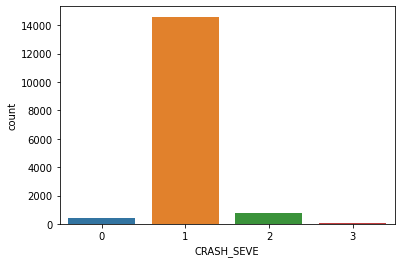

In [ ]:
sb.countplot(x=df['CRASH_SEVE'])

In [ ]:
severity_count = df['CRASH_SEVE'].value_counts().rename_axis('CRASH_SEVE').reset_index(name='num_accidents')
severity_count

,CRASH_SEVE,num_accidents
0,1,14596
1,2,755
2,0,408
3,3,81


In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
def multi_collinearity_heatmap(df, figsize=(11,9), annot=False):
    
    """
    Creates a heatmap of correlations between features in the df. A figure size can optionally be set.
    """
    
    # Set the style of the visualization
    sns.set(style="white")

    # Create a covariance matrix
    corr = df.corr()

    # Generate a mask the size of our covariance matrix
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, annot=annot, cbar_kws={"shrink": .5}, vmax=corr[corr != 1.0].max().max());


<ipython-input-9-cfe35c85dc56>:14: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


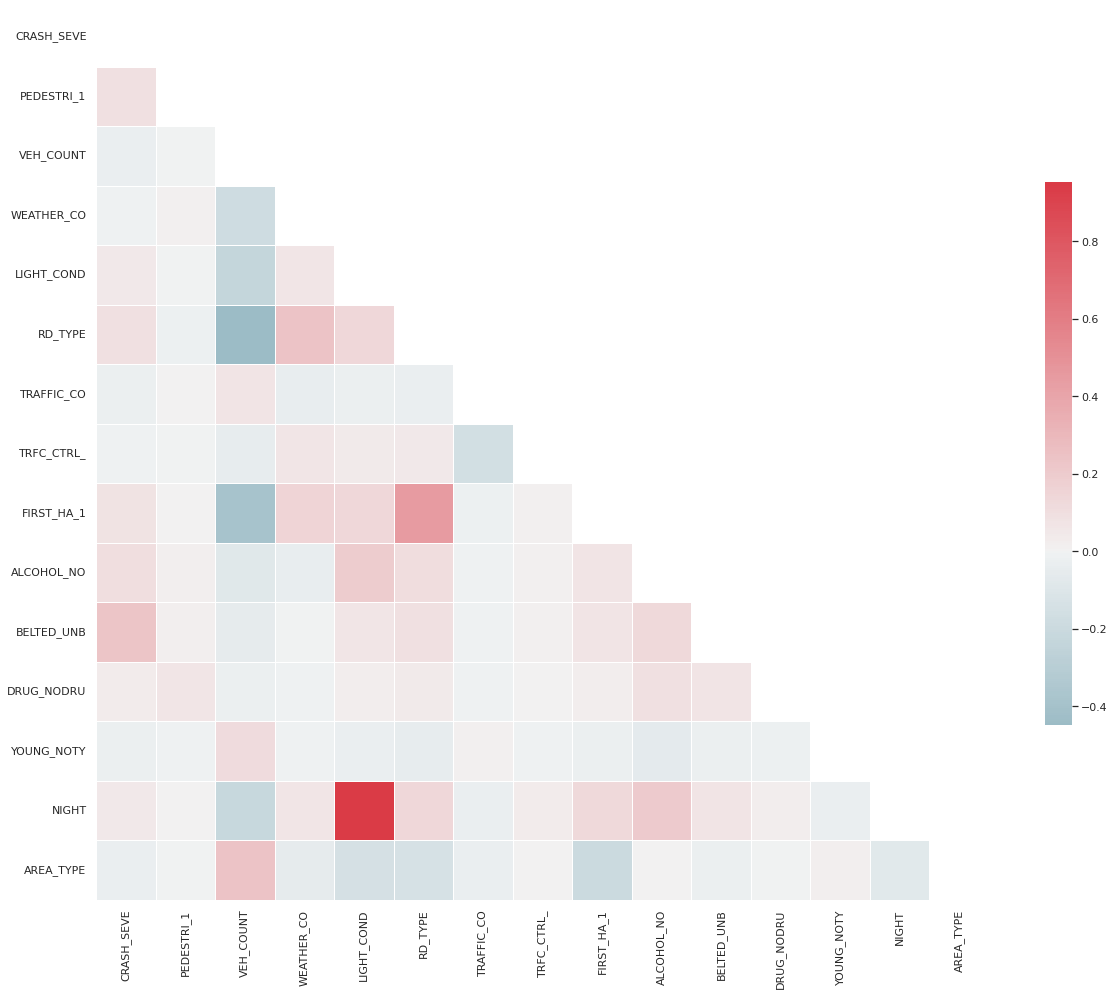

In [ ]:
multi_collinearity_heatmap(df, figsize=(20,20))

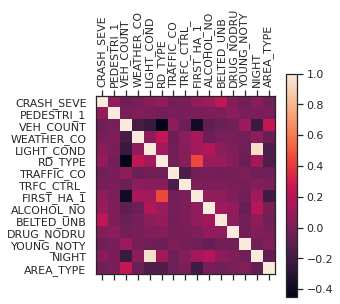

In [ ]:
corr_matrix = df.corr()
plt.matshow(corr_matrix)
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.colorbar()
plt.show()

Text(0.5, 1.0, 'Tips by Day of the Week by Gender')

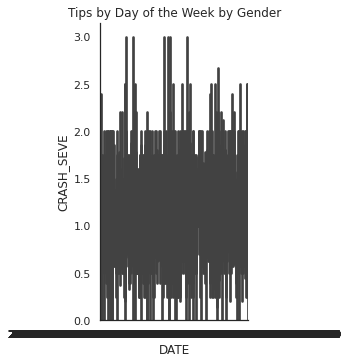

In [ ]:
df['DATE']=df.index
sns.catplot(x='DATE', y='CRASH_SEVE',data=df,kind='bar')
